In [50]:
print('의류 이미지 분류')

의류 이미지 분류


In [51]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.6.0


In [52]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [53]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

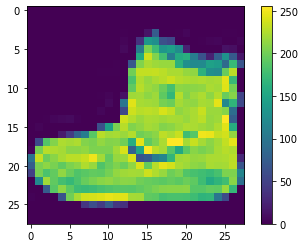

In [54]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

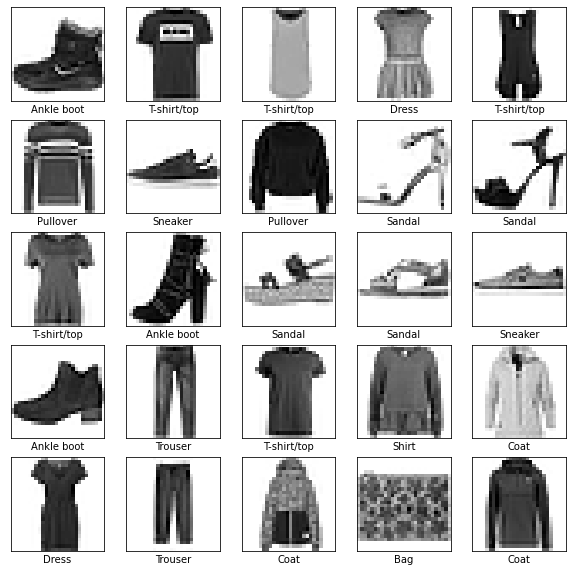

In [55]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [57]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [58]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4931 - accuracy: 0.8274
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3723 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3344 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3111 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2908 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2776 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2653 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 993us/step - loss: 0.2542 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2449 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 986us/step - loss: 0

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

In [59]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3367 - accuracy: 0.8831

Test accuracy: 0.8830999732017517


In [60]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [61]:
predictions = probability_model.predict(test_images)

In [62]:
predictions[0]

array([1.7651906e-06, 6.6516503e-07, 3.5961534e-08, 1.5710451e-09,
       1.9192922e-07, 1.1628027e-03, 4.3106450e-08, 2.9157694e-02,
       8.3559819e-08, 9.6967667e-01], dtype=float32)

In [63]:
np.argmax(predictions[0])

9

In [64]:
test_labels[0]

9

In [65]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

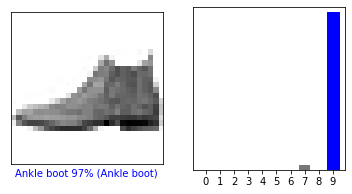

In [66]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

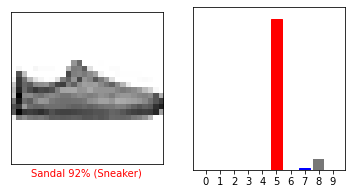

In [67]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

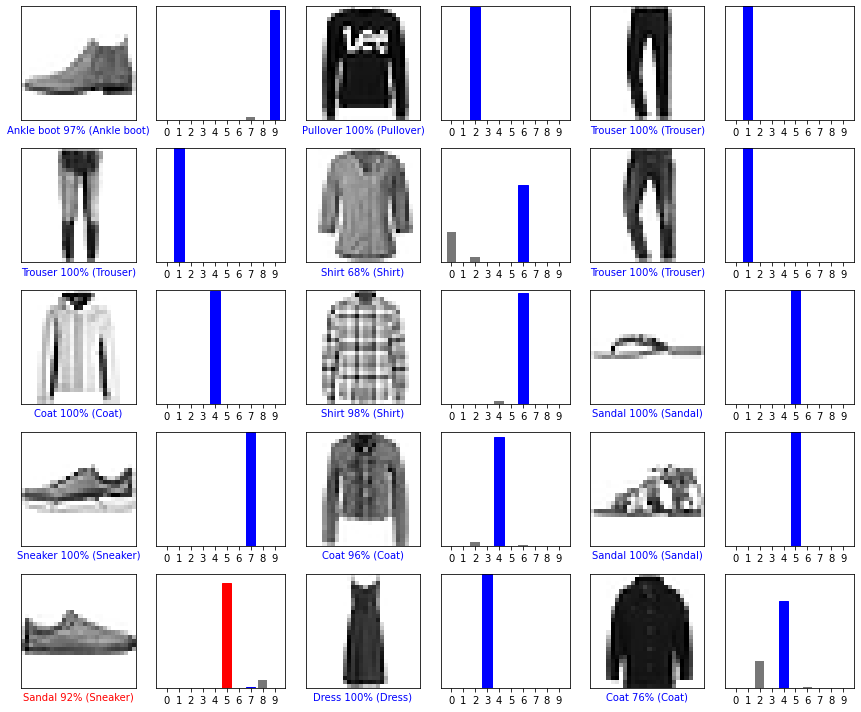

In [68]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [69]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [70]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [71]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.9553359e-04 7.0851840e-12 9.9855179e-01 2.1942680e-12 1.2499323e-03
  3.4829588e-17 2.7189953e-06 2.1530790e-16 1.7548120e-10 4.1973842e-12]]


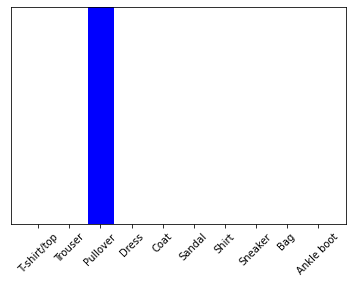

In [72]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [73]:
np.argmax(predictions_single[0])


2

In [74]:
np.argmax(predictions_single[0])

2